1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [45]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter



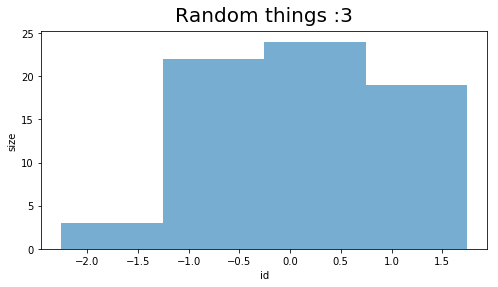

In [18]:
N = 70
x = np.random.normal(0,1, N)
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8, 4))
freq, bins,_  = ax.hist(x, bins=np.arange(x.min(), x.max()), alpha=0.6)
ax.set_title("Random things :3", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("id")
ax.set_ylabel("size")
fig.show()

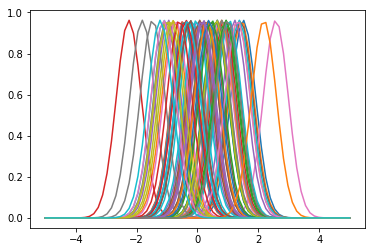

Normalized integral: 55.999999997341845
Histogram: 68.0


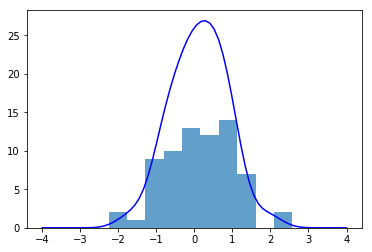

In [21]:
norms = []
for i in x:
    d = np.linspace(-4, 4, N)
    g = stats.norm.pdf(dominio, i, 1.06*x.std()*x.size**(-(1/5)))
    norms.append(g)
    plt.plot(dominio, g, '-')
plt.show()

norms = np.array(norms)
s = np.sum(norms, axis=0)
step_size = bins[1] - bins[0]

print("Normalized integral:", integrate.trapz(s*step_size, d))
print("Histogram:", np.sum(step_size*freq))
plt.hist(x, alpha = 0.7);
plt.plot(d, s*step_size, '-b');

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

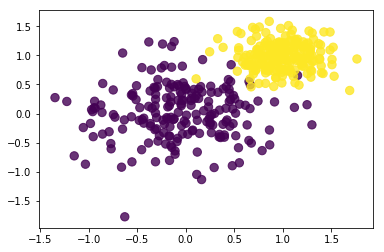

In [4]:
from IPython.display import Image
Image('../data/p.png')

(array([  3,  21,  70, 163, 234, 253, 169,  64,  22,   1], dtype=int64), array([-0.54668068, -0.47764681, -0.40861294, -0.33957907, -0.2705452 ,
       -0.20151132, -0.13247745, -0.06344358,  0.00559029,  0.07462416,
        0.14365803]))
[-0.54668068 -0.47764681 -0.40861294 -0.33957907 -0.2705452  -0.20151132
 -0.13247745 -0.06344358  0.00559029  0.07462416]
[  3  21  70 163 234 253 169  64  22   1]


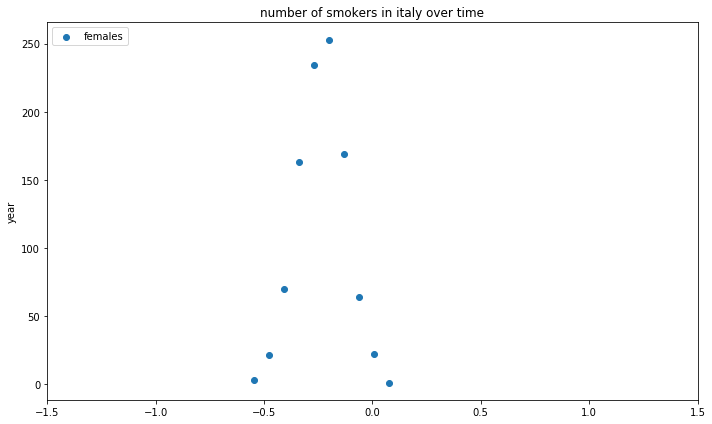

In [29]:
import scipy.stats as stats
x=np.linspace(-1.5,1.5,1000)
a, b = -1.5, 1.5
mu, sigma = -0.2, 0.1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)

vals = dist.rvs(1000)
y,x= np.histogram(a=vals)
print(np.histogram(a=vals))
print(x[0:10])
print(y)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=x[0:10],y=y, label='females')
# ax.scatter(x=yrs, y=y[0,:]+5, label='males')

ax.set_title('number of smokers in italy over time')
ax.legend(loc='upper left')
ax.set_ylabel('numbers in thousands')
ax.set_ylabel('year')
ax.set_xlim(-1.5,1.5)
fig.tight_layout()

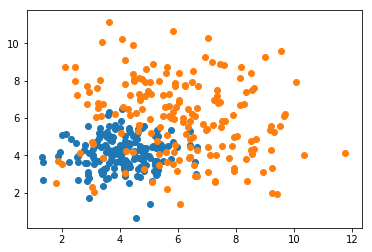

In [37]:
means = [4, 6]
stds  = [1.0, 2.2]
n=180
for i in range(len(means)):
    x = np.random.normal(means[i], stds[i], n)
    y = np.random.normal(means[i], stds[i], n)
    plt.scatter(x,y)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

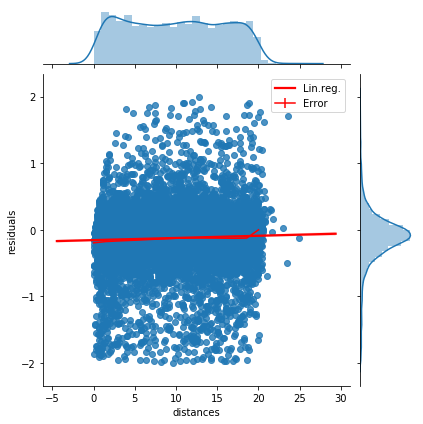

In [55]:
data = np.load('residuals_261.npy',allow_pickle=True).item()
ds = pd.DataFrame(data)
ds = ds[ abs(ds['residuals'])<2 ]

lr = stats.linregress(ds['distances'], ds['residuals'])
sns.jointplot(ds['distances'], ds['residuals'], kind='reg',
             line_kws={'color':'red', 'label':'Lin.reg.'})

step = 15
x = np.linspace(0,20,step)
y = np.zeros(x.size)
arry = np.zeros(x.size)

c = 0
_e = x[0]
for e in x[1:]:
    b = ds[ ds['distances']>=_e ]
    b =  b[  b['distances']<e ]
    bVal = b['residuals']
    
    y[c] = bVal.mean()
    erry[c] = bVal.std()
    prevEl = e
    c += 1

plt.errorbar(x, y, yerr=arry, color='red', label='Error')
plt.legend();